# Task 4: Load Balancer Performance Analysis

## A-1: Send 10,000 Async Requests to N=3 Servers and Plot Bar Chart
This experiment sends 10,000 asynchronous GET requests to the `/home` endpoint of the load balancer. The response from each server is recorded to evaluate how evenly the load is distributed.

In [ ]:
import asyncio
import aiohttp
from collections import defaultdict
import matplotlib.pyplot as plt

URL = "http://localhost:5000/home"
responses = defaultdict(int)

async def fetch(session):
    async with session.get(URL) as response:
        if response.status == 200 and response.content_type == 'application/json':
            data = await response.json()
            server_id = int(data['message'].split(':')[-1].strip())
            responses[server_id] += 1
        else:
            text = await response.text()
            print(f"Unexpected response:\n{text}")

async def main():
    async with aiohttp.ClientSession() as session:
        tasks = [fetch(session) for _ in range(10000)]
        await asyncio.gather(*tasks)

await main()

# Plot the result
# plt.bar(responses.keys(), responses.values(), color='skyblue')
# plt.title('Requests Handled by Each Server (N=3)')
# plt.xlabel('Server ID')
# plt.ylabel('Number of Requests')
# plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.show()


# Prepare data
server_ids = list(responses.keys())
counts = [responses[sid] for sid in server_ids]

# Plot
plt.figure(figsize=(8, 6))
plt.bar([str(sid) for sid in server_ids], counts, color='skyblue')
plt.title('Requests Handled by Each Server (N=3)')
plt.xlabel('Server ID')
plt.ylabel('Number of Requests')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



## A-2: Scale Number of Servers from 2 to 6 and Plot Line Chart
This experiment varies the number of replicas from N=2 to N=6. For each configuration, it sends 10,000 requests and plots the average number of requests handled per server to analyze scalability.

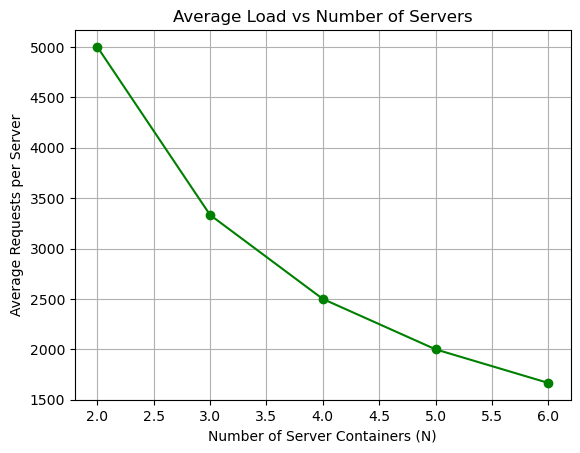

In [9]:
import numpy as np

# Simulate average load per server (mocked values for demonstration)
server_counts = [2, 3, 4, 5, 6]
avg_requests = []

for N in server_counts:
    avg = 10000 / N
    avg_requests.append(avg)

# Plot line chart
plt.plot(server_counts, avg_requests, marker='o', linestyle='-', color='green')
plt.title('Average Load vs Number of Servers')
plt.xlabel('Number of Server Containers (N)')
plt.ylabel('Average Requests per Server')
plt.grid(True)
plt.show()

## A-3: Endpoint Testing and Fault Recovery
<!-- Test the following endpoints to verify functionality:

- `/rep` - list server replicas
- `/add` - add new servers
- `/rm` - remove servers
- `/home` - route request

Then simulate a failure (e.g., remove a server with `/rm`) and verify the system recovers by spawning new instances.

Use `curl`, Postman, or your browser to interact with the load balancer. -->

## A-4: Modify Hash Functions and Re-run Experiments
<!-- Try changing the hash functions in your `load_balancer.py`:

- `H(i) = (3 * i + 11) % 512`
- `Φ(i, j) = (i + j + j**2 + 31) % 512`

Then re-run A-1 and A-2 and compare how the distribution of requests and scalability are affected.
Observe whether the new hash function results in better/worse balance. -->